# REGION GROWING

##### MEDICAL IMAGE ANALYSIS
##### Degree in Biomedical Engineering
##### Course 2020/2021


<div class="alert alert-block alert-info">
<b>Authors:</b> $$Raúl \quad López \quad González$$ <br>
$$Hugo \quad Calero \quad Diaz$$ <br>
$$Pablo \quad Laso \quad Mielgo$$

</div>

The **region growing** process starts by selecting a certain pixel (or group of them) from the area of interest, called seed, interactively or automatically.


In successive steps, the contiguous pixels are compared to the seed, and they are added to the ROI if they meet any homogeneity condition. This process is repeated over the entire image.


To grow regions, we must take into account how we define the connectivity or neighborhood between pixels. If we are only going to evaluate the propagation in the vertical and horizontal directions with respect to one pixel, we are talking about **neighborhood of 4.** If, on the other hand, we are going to compare the initial pixel with all its
adjacent pixels, we speak of **neighborhood of 8.**
Using one type of connectivity or another can have consequences on the final result, since the neighborhood of 4 is much more restrictive. The smaller the neighborhood that we are going to define, more spatially restrictive will be the growth of regions.

For this practice we are going to segment 2 different anatomical structures, using **connectivity of 8.**

The implementation of the ginput function that we were asked to use for the selection of the seeds has been done on a separate Jupyter Notebook (Ginput example). The reason behind this is that when trying to implement such function in the same notebook as the segmentation algorithm, the matplotlib library gave us problems when trying to plot the resultant images. To succesfully use the ginput function we had to implement 'TkAgg' interface from matplotlib and although this was perfect for ginput, it did not permit us to later show the results.

---

In [1]:
# Modules that we use in this practice

from skimage import io
import numpy as np
%pylab inline 
import matplotlib.pyplot as plt
#matplotlib.use('TkAgg')
import matplotlib.image as mpimg
import cv2
import os
from pydicom import dcmread

from Exercise2 import submatrix, RegionGrowingP2

Populating the interactive namespace from numpy and matplotlib


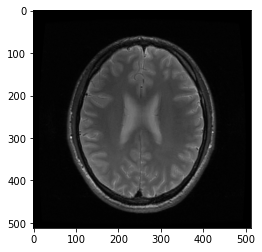

In [8]:
image_in = "IM-0003-0023.dcm"
ds = dcmread(image_in)
img_in = ds.pixel_array
img = img_in
plt.imshow(img, cmap = "gray")

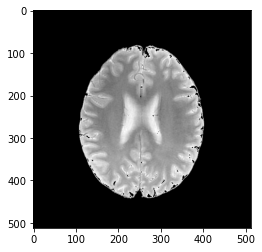

In [21]:
zona, mask = RegionGrowingP2("dicom", image_in, 0.15, -0.15, [(323, 263), (338,282), (190,174), (160, 261)])
plt.imshow(zona, cmap = "gray")

## SEGMENTING THE VENTRICLES

Given that in the original image there seems to be a shadow between the 2 ventricles, to obtain the ventricles we have had to do it separately (left_ventricle, right_ventricle) and then add both images together.

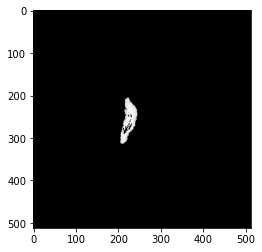

In [3]:
image_in = "IM-0003-0023.dcm"

left_ventricle, mask = RegionGrowingP2("dicom", image_in, 0.043, -0.043, [(220, 220)])
plt.imshow(left_ventricle, cmap = "gray")

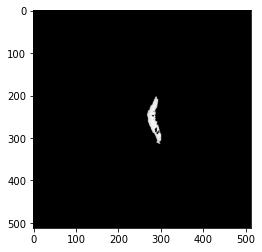

In [4]:
right_ventricle, mask = RegionGrowingP2("dicom", image_in, 0.043, -0.043, [(280, 280)])
plt.imshow(right_ventricle, cmap = "gray")

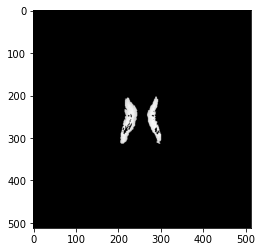

In [5]:
ventricles = right_ventricle+left_ventricle
plt.imshow(ventricles, cmap = "gray")

Considering that in the resultant segmentation for the ventricles , there are some small areas where it is still black, we have decided to apply a Closing algorithm to obtain a better result. To do so, we have used as a kernel, a matrix of 6x6 dimension.

The end result of all this process is a mask for the ventricles of the brain of the patient.

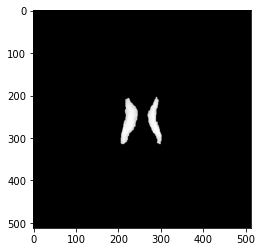

In [6]:
kernel = np.ones((6, 6), np.uint8)
closed = cv2.morphologyEx(ventricles, cv2.MORPH_CLOSE, kernel)

plt.imshow(closed, cmap = "gray")

## SEGMENTING THE GRAY MATTER

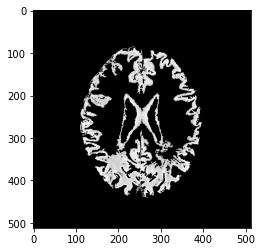

In [7]:
filtered_image, mask = RegionGrowingP2("dicom", image_in, 0.042, -0.042, [(250, 250)])
plt.imshow(filtered_image, cmap = "gray")

We obtain the gray matter, but also other areas (lower area)that do not belong to it.
<br>This occurs because the inside (WM) of the brain has similar gray values as the GM in the lower part of our image. <p>This segmentation method is probably not the optimal. We could use another algorithm or implement it by further processing.

---
HRL